In [1]:
import os
import geopandas

import json
import topojson

from IPython.display import SVG, display
from shapely import geometry
%matplotlib inline

In [2]:
high_res = '/Users/mattijnvanhoek/Downloads/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp'

### natural earth low resolution

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


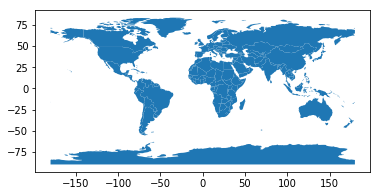

In [3]:
data = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
data.plot()
data.head()

In [15]:
# apply topolgy where vertices are snapped to a grid before applying topology (quantization)
tj_data = topojson.topology(data, simplify=True, simplify_factor=1000)

In [10]:
tj_data['arcs'][0]

[[532594, 418659],
 [-261, 3621],
 [385, 5063],
 [958, 5273],
 [145, 2471],
 [901, 5192],
 [662, 2359],
 [1596, 3768],
 [891, 2563],
 [292, 4266],
 [-146, 3264],
 [-831, 2059],
 [-739, 3494],
 [-683, 3455],
 [150, 1197],
 [853, 2283],
 [-842, 5563],
 [-569, 3856],
 [-1392, 3643],
 [264, 1119]]

In [6]:
tj_data['arcs'][0]

[[532594, 418659],
 [-261, 3621],
 [385, 5063],
 [958, 5273],
 [145, 2471],
 [901, 5192],
 [662, 2359],
 [1596, 3768],
 [891, 2563],
 [292, 4266],
 [-146, 3264],
 [-831, 2059],
 [-739, 3494],
 [-683, 3455],
 [150, 1197],
 [853, 2283],
 [-842, 5563],
 [-569, 3856],
 [-1392, 3643],
 [264, 1119]]

In [ ]:
# present timing split out in the different subtasks
ex = topojson.extract(data)
jo = topojson.join(ex, quant_factor=1e4)
cu = topojson.cut(jo)
de = topojson.dedup(cu)
ha = topojson.hashmap(de, simplify_factor=10)

In [11]:
# write computed topology to file
tj_path = 'highres.topojson'
with open(tj_path, 'w') as fp:
    json.dump(tj_data, fp)

In [12]:
# # compare file sizes of the geojson and topjson file
# gj_path = 'tests/files_geojson/naturalearth_lowres.geojson'
# tj_kb = os.path.getsize(tj_path)/1000
# gj_kb = os.path.getsize(gj_path)/1000
# print('topojson naturalearth_loweres: {}kb\ngeojson naturalearth_loweres: {}kb'.format(tj_kb, gj_kb))

,id,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21068121068132 35.65008900834901,..."
1,1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32655632655641 -5.87753264903265...
2,2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59040059040069 41.8554775794176, ..."
3,3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57959157959169 24.24541275553275,..."
4,4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50008550008543 -55.199918341748...


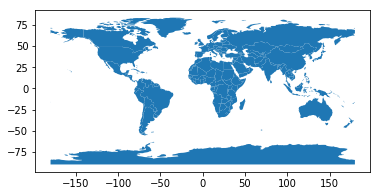

In [13]:
# read the saved topojson file into geopandas and see that it works!
data_tj = geopandas.read_file(tj_path)
data_tj.plot()
data_tj.head()

Afghanistan


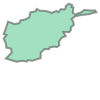

Angola


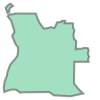

Albania


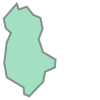

United Arab Emirates


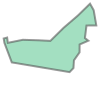

Argentina


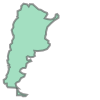

Armenia


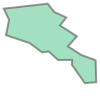

Antarctica


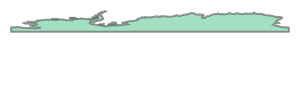

Fr. S. Antarctic Lands


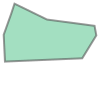

Australia


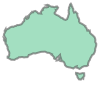

Austria


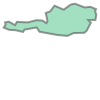

Azerbaijan


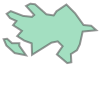

Burundi


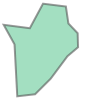

Belgium


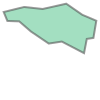

Benin


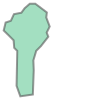

Burkina Faso


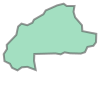

Bangladesh


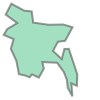

Bulgaria


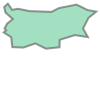

Bahamas


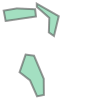

Bosnia and Herz.


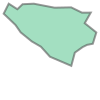

Belarus


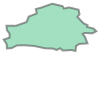

Belize


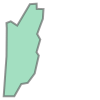

Bolivia


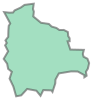

Brazil


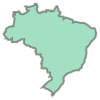

Brunei


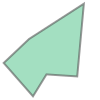

Bhutan


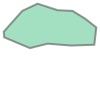

Botswana


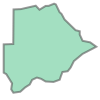

Central African Rep.


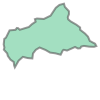

Canada


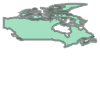

Switzerland


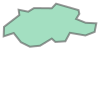

Chile


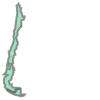

China


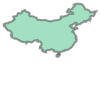

Côte d'Ivoire


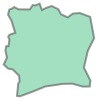

Cameroon


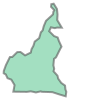

Dem. Rep. Congo


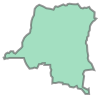

Congo


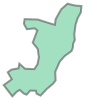

Colombia


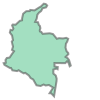

Costa Rica


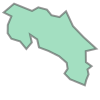

Cuba


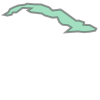

N. Cyprus


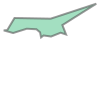

Cyprus


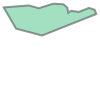

Czech Rep.


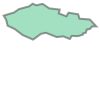

Germany


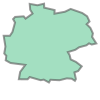

Djibouti


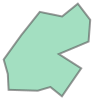

Denmark


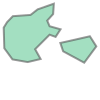

Dominican Rep.


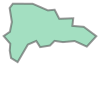

Algeria


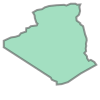

Ecuador


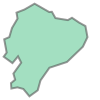

Egypt


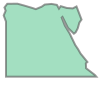

Eritrea


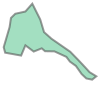

Spain


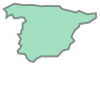

Estonia


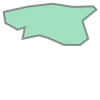

Ethiopia


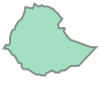

Finland


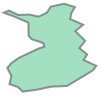

Fiji


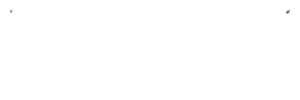

Falkland Is.


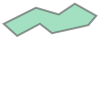

France


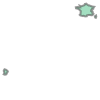

Gabon


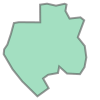

United Kingdom


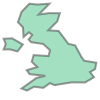

Georgia


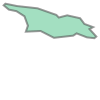

Ghana


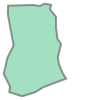

Guinea


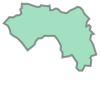

Gambia


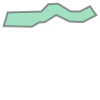

Guinea-Bissau


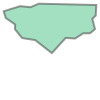

Eq. Guinea


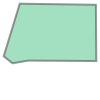

Greece


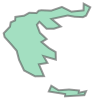

Greenland


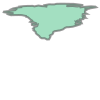

Guatemala


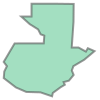

Guyana


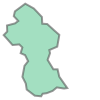

Honduras


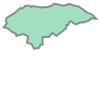

Croatia


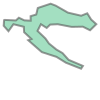

Haiti


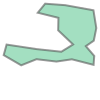

Hungary


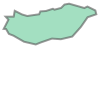

Indonesia


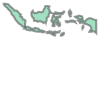

India


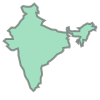

Ireland


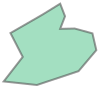

Iran


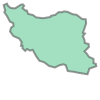

Iraq


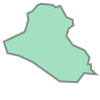

Iceland


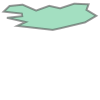

Israel


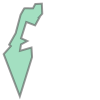

Italy


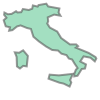

Jamaica


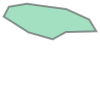

Jordan


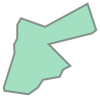

Japan


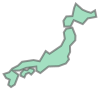

Kazakhstan


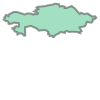

Kenya


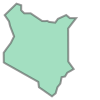

Kyrgyzstan


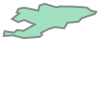

Cambodia


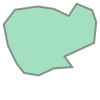

Korea


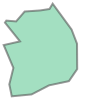

Kosovo


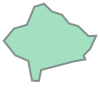

Kuwait


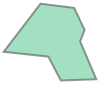

Lao PDR


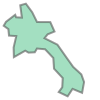

Lebanon


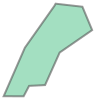

Liberia


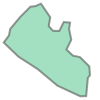

Libya


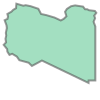

Sri Lanka


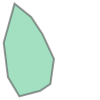

Lesotho


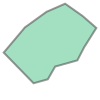

Lithuania


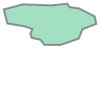

Luxembourg


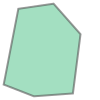

Latvia


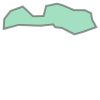

Morocco


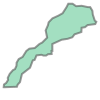

Moldova


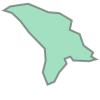

Madagascar


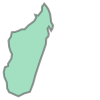

Mexico


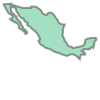

Macedonia


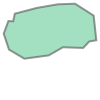

Mali


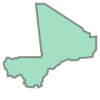

Myanmar


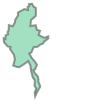

Montenegro


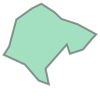

Mongolia


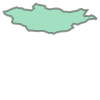

Mozambique


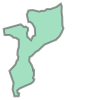

Mauritania


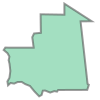

Malawi


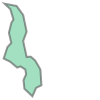

Malaysia


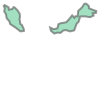

Namibia


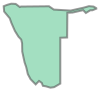

New Caledonia


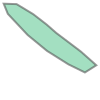

Niger


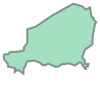

Nigeria


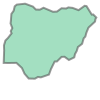

Nicaragua


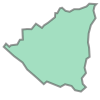

Netherlands


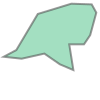

Norway


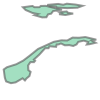

Nepal


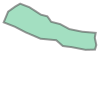

New Zealand


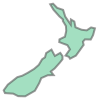

Oman


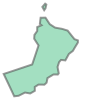

Pakistan


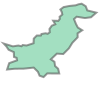

Panama


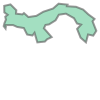

Peru


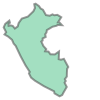

Philippines


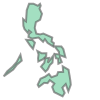

Papua New Guinea


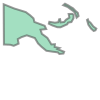

Poland


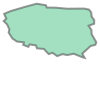

Puerto Rico


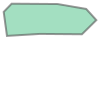

Dem. Rep. Korea


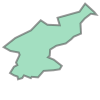

Portugal


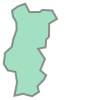

Paraguay


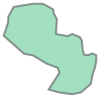

Palestine


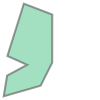

Qatar


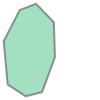

Romania


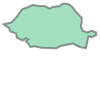

Russia


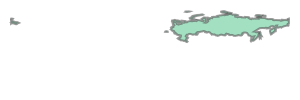

Rwanda


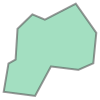

W. Sahara


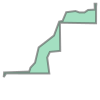

Saudi Arabia


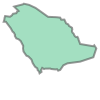

Sudan


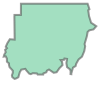

S. Sudan


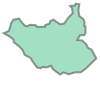

Senegal


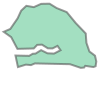

Solomon Is.


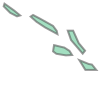

Sierra Leone


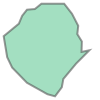

El Salvador


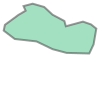

Somaliland


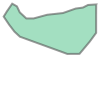

Somalia


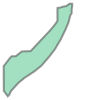

Serbia


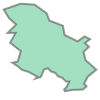

Suriname


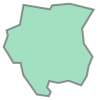

Slovakia


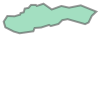

Slovenia


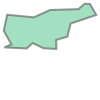

Sweden


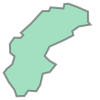

Swaziland


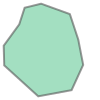

Syria


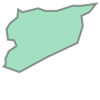

Chad


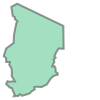

Togo


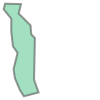

Thailand


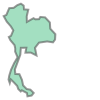

Tajikistan


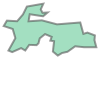

Turkmenistan


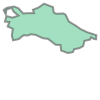

Timor-Leste


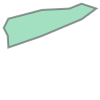

Trinidad and Tobago


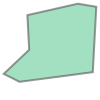

Tunisia


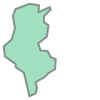

Turkey


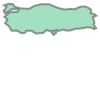

Taiwan


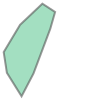

Tanzania


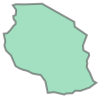

Uganda


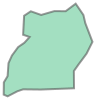

Ukraine


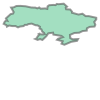

Uruguay


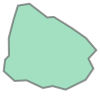

United States


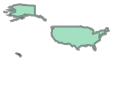

Uzbekistan


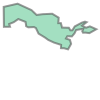

Venezuela


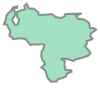

Vietnam


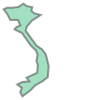

Vanuatu


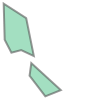

Yemen


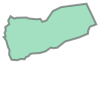

South Africa


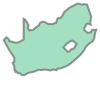

Zambia


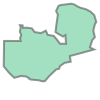

Zimbabwe


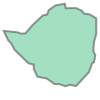

In [14]:
for gdf_row in data_tj.iterrows():
    print(gdf_row[1]['name'])
    g1_svg = gdf_row[1].geometry._repr_svg_() 
    display(SVG(g1_svg))

In [ ]:
%%prun -l 10
# present timing of applying the whole topology
tj_data = topojson.topology(data, snap_vertices=True, gridsize_to_snap=1e6)

In [ ]:
%%prun -l 10
# present timing split out in the different subtasks
ex = topojson.extract(data)
jo = topojson.join(ex, quant_factor=1e4)
cu = topojson.cut(jo)
de = topojson.dedup(cu)
ha = topojson.hashmap(de)